In [0]:
from pyspark.ml import PipelineModel
from pyspark.sql.functions import input_file_name

In [0]:
basePath = "/FileStore/finalproject"

In [0]:
load_fit_model = PipelineModel.load(basePath + "/model")

In [0]:
parquet_df = spark.read.parquet(basePath + "/parquet_files")

# Show the contents of the DataFrame
parquet_df.show()

+--------------------+--------------------+
|           timestamp|                news|
+--------------------+--------------------+
|2024-05-05 02:00:...|Why has hiring pl...|
|2024-05-05 02:00:...|Apple iPhone weak...|
|2024-05-05 02:00:...|Read the wild ema...|
|2024-05-05 02:00:...|Have the wheels c...|
|2024-05-05 02:00:...|Chances Of Skydan...|
|2024-05-05 02:00:...|Here's how much m...|
|2024-05-05 02:00:...|Trump Media audit...|
|2024-05-05 02:00:...|Microsoft ties ex...|
|2024-05-05 02:00:...|Fed-Obsessed Trad...|
|2024-05-05 02:00:...|Cybertruck owner ...|
|2024-05-05 02:00:...|Carvana stock reb...|
|2024-05-05 02:00:...|Apple remains Buf...|
|2024-05-05 02:00:...|US loosens some e...|
|2024-05-05 02:00:...|Walmart closes do...|
|2024-05-05 02:00:...|Rue21 files for b...|
|2024-05-05 02:00:...|Jack Dorsey's Blo...|
|2024-05-05 02:00:...|Why Rivian Shares...|
|2024-05-05 02:00:...|Google, Justice D...|
|2024-05-05 02:00:...|Bay Area restaura...|
|2024-05-05 02:00:...|25K Americ

In [0]:
from pyspark.sql.functions import input_file_name

# Read the Parquet files and add a column with the file path
parquet_df = spark.read.parquet(basePath + "/parquet_files") \
                    .withColumn("file_path", input_file_name())

# Find the latest files based on the file path (assuming they are named with timestamps)
latest_files_df = parquet_df.orderBy("file_path", ascending=False).limit(5)

# Show the contents of the DataFrame
latest_files_df.show()


+--------------------+--------------------+--------------------+
|           timestamp|                news|           file_path|
+--------------------+--------------------+--------------------+
|2024-05-05 02:00:...|Why has hiring pl...|dbfs:/FileStore/f...|
|2024-05-05 02:00:...|Chances Of Skydan...|dbfs:/FileStore/f...|
|2024-05-05 02:00:...|Apple iPhone weak...|dbfs:/FileStore/f...|
|2024-05-05 02:00:...|Read the wild ema...|dbfs:/FileStore/f...|
|2024-05-05 02:00:...|Have the wheels c...|dbfs:/FileStore/f...|
+--------------------+--------------------+--------------------+



In [0]:
titles_df = parquet_df.select("news")

predictions = load_fit_model.transform(titles_df)

In [0]:
# Check the schema of the predictions DataFrame
predictions.printSchema()

# Show the first few rows of the predictions DataFrame to see the column names and data
predictions.show()

# If the column name is different, use the correct column name for sentiment
# For example, if the column name is 'prediction', use that instead
predictions.select("news", "prediction").show()


root
 |-- news: string (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- rawFeatures: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|                news|               words|         rawFeatures|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|Why has hiring pl...|[why, has, hiring...|(4000,[32,344,508...|(4000,[32,344,508...|[-4.8559283100614...|[2.35646729616249...|       2.0|
|Apple iPhone weak...|[apple, iphone, w...|(4000,[171,224,12...|(4000,[171,224,12...|[8.79094334364940..

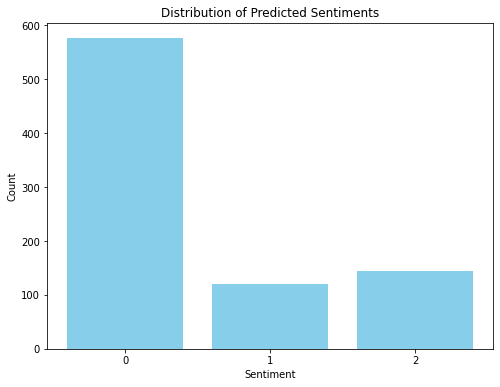

In [0]:
import matplotlib.pyplot as plt

# Extracting the predicted sentiments and their counts
sentiment_counts = predictions.groupBy("prediction").count().collect()
sentiments = [row["prediction"] for row in sentiment_counts]
counts = [row["count"] for row in sentiment_counts]

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(sentiments, counts, color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Predicted Sentiments')
plt.xticks(sentiments)  # Set x-axis ticks to match sentiment labels
plt.show()


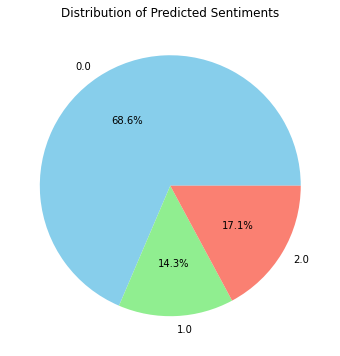

In [0]:
sentiment_counts = predictions.groupBy("prediction").count().collect()
sentiments = [row["prediction"] for row in sentiment_counts]
counts = [row["count"] for row in sentiment_counts]

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Predicted Sentiments')
plt.show()


In [0]:
# Path to the folder you want to delete
folder_path = "/FileStore/finalproject/parquet_files"

# Recursively delete the folder
dbutils.fs.rm(folder_path, recurse=True)

Out[23]: True

In [0]:
# Path to the folder you want to delete
folder_path = "/FileStore/finalproject/checkpoint_location"

# Recursively delete the folder
dbutils.fs.rm(folder_path, recurse=True)

Out[24]: True